<a href="https://colab.research.google.com/github/AgnosticRohan/CodSoft/blob/main/Task_4_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.**
**In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.**

In [1]:
#IMPORTING THE LIBRERIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#LOADING THE DATASET
sales = pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [3]:
#DATA SET SHAPE
sales.shape


(200, 4)

In [4]:
#CHECHING THE STRUCTUERE OF THE DATASET
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#FIRST FIVE ROWS OF THE DATA SET

sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#LAST FIVE ROWS OF THE DATA SET
sales.tail()


,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
#CHECKING THE RONDOM ROWS IN THE DATA SET
sales.sample(7)


,TV,Radio,Newspaper,Sales
157,149.8,1.3,24.3,10.1
67,139.3,14.5,10.2,13.4
168,215.4,23.6,57.6,17.1
138,43.0,25.9,20.5,9.6
69,216.8,43.9,27.2,22.3
137,273.7,28.9,59.7,20.8
149,44.7,25.8,20.6,10.1


In [8]:
#CHECHING AND IDENTIFYING ANY NULL VALUES
sales.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#CHECING THE ANY DUPLICATES IN THE DATA SET

sales.duplicated().sum()

0

# **STATISTICAL DATA ANALYSIS**

In [10]:
#STATISTICAL DATA ANALYSIS BY USING "DESCRIBE" FUNCTION
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


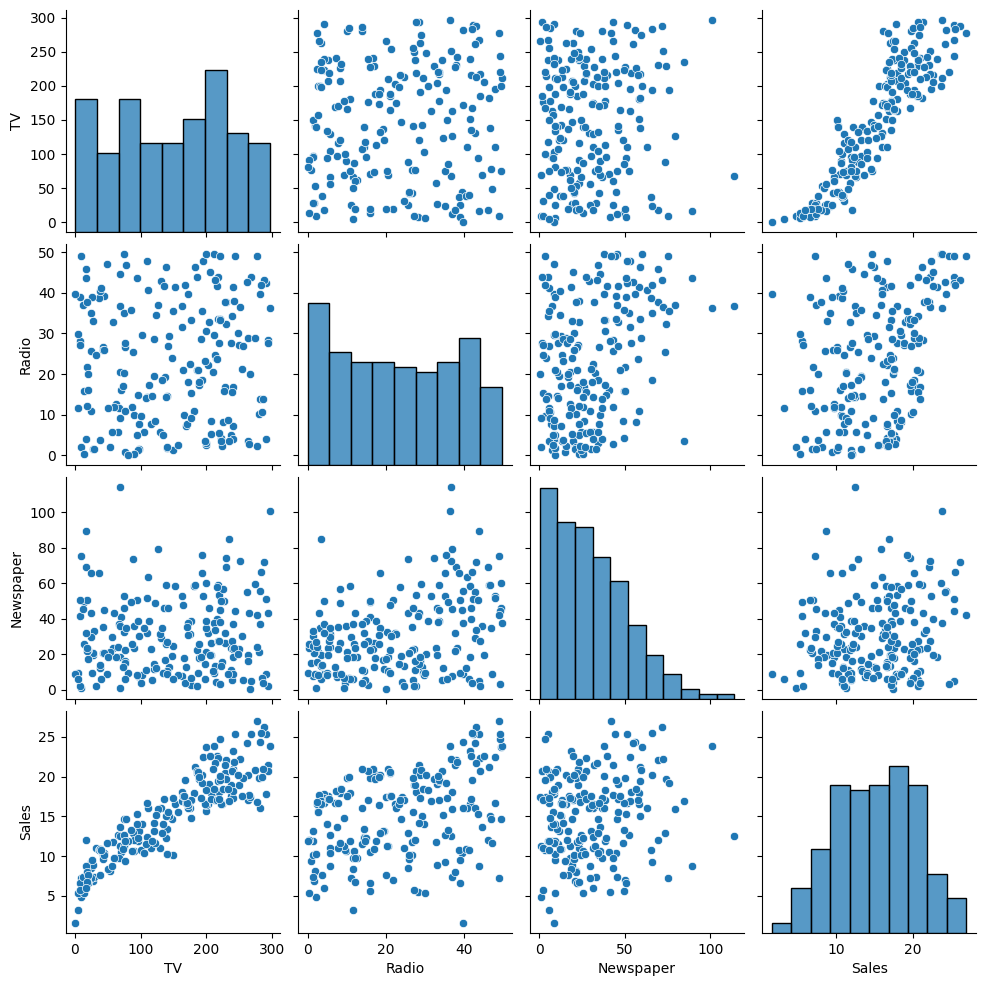

In [11]:
#DISTRIBUTION OF ALL COLUMNS IN THE DATASET
sns.pairplot(sales)
plt.show()

# **EXPLORATARY DATA ANALYSIS AND DATA VISUVALAIZATION**

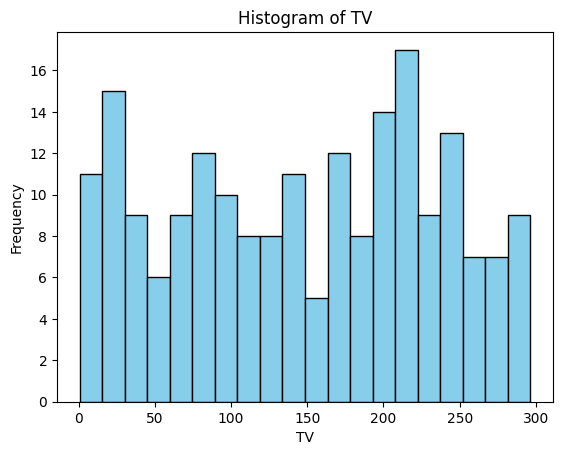

TV
109.8    2
177.0    2
240.1    2
76.4     2
222.4    2
        ..
97.2     1
97.5     1
100.4    1
102.7    1
296.4    1
Length: 190, dtype: int64

In [12]:
#DISTRIBUTION OF TV
plt.hist(sales['TV'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.title('Histogram of TV')
plt.show()
sales.value_counts('TV')

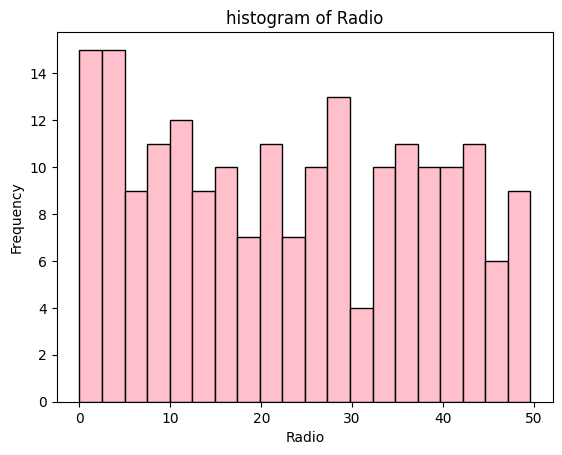

In [13]:
plt.hist(sales['Radio'],bins=20,color = 'pink',edgecolor = 'black')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.title('histogram of Radio')
plt.show()

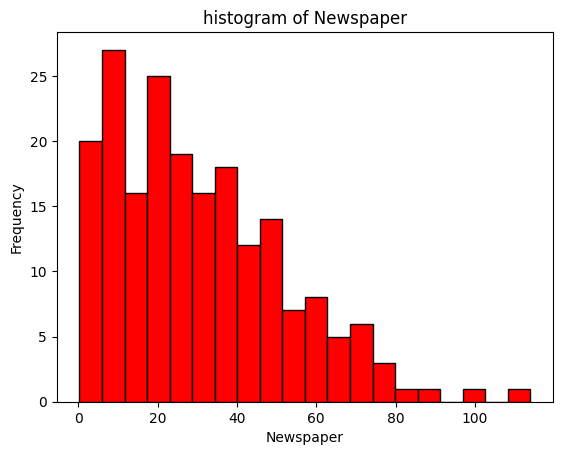

In [14]:
plt.hist(sales['Newspaper'],bins=20,color = 'red',edgecolor = 'black')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.title('histogram of Newspaper')
plt.show()

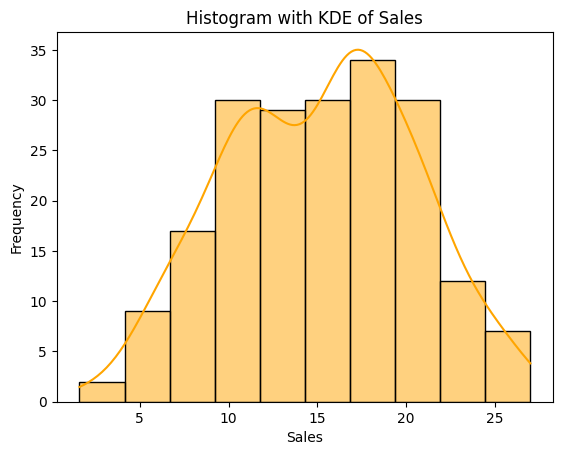

In [15]:
sns.histplot(sales['Sales'], kde=True, color='orange')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Sales')
plt.show()


In [16]:
total_sales_tv = sales['Sales'].sum()
total_sales_radio = sales['Radio'].sum()
total_sales_newspaper = sales['Newspaper'].sum()

print(total_sales_tv )
print(total_sales_radio)
print(total_sales_newspaper)

3026.1000000000004
4652.800000000001
6110.799999999999


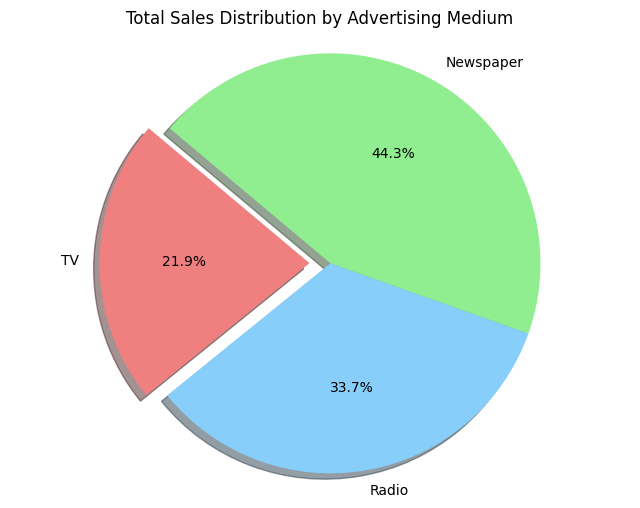

In [17]:
#  pie chart
labels = ['TV', 'Radio', 'Newspaper']
sizes = [total_sales_tv, total_sales_radio, total_sales_newspaper]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0)  # explode the 1st slice (TV)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total Sales Distribution by Advertising Medium')
plt.show()

# **MACHINE LEARNING TRAIN-TEST**

In [18]:
from sklearn.model_selection import train_test_split

X = sales[['TV', 'Radio', 'Newspaper']]  # Features
y = sales['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (160, 3) (160,)
Testing set shape: (40, 3) (40,)


In [19]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:

from sklearn.metrics import mean_squared_error

# 'X_train', 'X_test', 'y_train', 'y_test' are  training and testing sets
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)


RMSE: 1.7052146229349223


In [25]:
from sklearn.svm import SVR

model_svr = SVR(kernel='linear')
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr) ** 0.5
print("SVR RMSE:", rmse_svr)


SVR RMSE: 1.6779044854664134


In [22]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 1.2499108168185449


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5
print("Gradient Boosting RMSE:", rmse_gb)


Gradient Boosting RMSE: 1.1140693029214994


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE
rmse_lr = mean_squared_error(y_test, y_pred) ** 0.5
rmse_svr = mean_squared_error(y_test, y_pred_svr) ** 0.5
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5

# MAE
mae_lr = mean_absolute_error(y_test, y_pred)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# R-squared
r2_lr = r2_score(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print("Linear Regression:")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R-squared:", r2_lr)

print("\nSVR:")
print("RMSE:", rmse_svr)
print("MAE:", mae_svr)
print("R-squared:", r2_svr)

print("\nRandom Forest Regression:")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R-squared:", r2_rf)

print("\nGradient Boosting Regression:")
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)
print("R-squared:", r2_gb)


Linear Regression:
RMSE: 1.7052146229349223
MAE: 1.2748262109549338
R-squared: 0.9059011844150826

SVR:
RMSE: 1.6779044854664134
MAE: 1.280988201069537
R-squared: 0.9088911571967241

Random Forest Regression:
RMSE: 1.2499108168185449
MAE: 0.9647000000000002
R-squared: 0.9494426719437171

Gradient Boosting Regression:
RMSE: 1.1140693029214994
MAE: 0.8213504346334876
R-squared: 0.9598347498402323
